In [22]:
import os
import tensorflow as tf
from tensorflow import keras
import qkeras
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, AveragePooling2D, MaxPooling2D, Add
from tensorflow.keras.regularizers import l1_l2
from qkeras.qlayers import QDense, QActivation
from qkeras.qconvolutional import QConv2D
from qkeras.qconv2d_batchnorm import QConv2DBatchnorm
from qkeras.qpooling import QAveragePooling2D
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
import cv2
import matplotlib.pyplot as plt


# UPLOAD MODEL
# path to model relative to downsample_tb.py
model_file_path = os.path.join("../training/trained_model", "model_best.h5")
co = {}
_add_supported_quantized_objects(co)
model = keras.models.load_model(model_file_path, custom_objects = co)

In [23]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        print(filename)   # use this to create y_dtest!!!!
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return np.array(images)

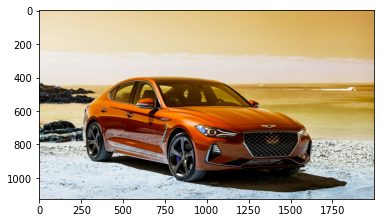

In [175]:
img = cv2.imread("./new_imgs/automobile.jpg")
plt.imshow(img)

-125
2125


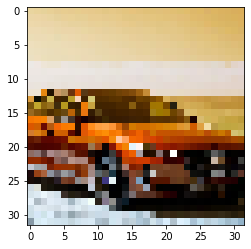

In [176]:
smallest_dim = np.min(np.array([img.shape[0], img.shape[1]]))

print(int(img.shape[1]/2)-smallest_dim)
print(int(img.shape[1]/2)+smallest_dim)
plane = img[int(img.shape[0]/2)-int(smallest_dim/2):int(img.shape[0]/2)+int(smallest_dim/2),
            int(img.shape[1]/2)-int(smallest_dim/2):int(img.shape[1]/2)+int(smallest_dim/2),
            :]
res = cv2.resize(plane, dsize=(32, 32), interpolation=cv2.INTER_NEAREST)

plt.imshow(res)

# cv2.imwrite("airplane_small.jpg", res)

In [177]:
X_dtest = np.ascontiguousarray(res, dtype=np.float32)  # doesn't change shape, just turns every element to float instead of int
X_dtest = X_dtest/256.

X_dtest = np.array([X_dtest])

y_dtest = np.array([0])

y_pred = model.predict(X_dtest)
print(np.argmax(y_pred, axis=1))

[1]
